In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from PIL import Image
from scipy.spatial import ConvexHull
import os

In [2]:
def replace_zero_coordinates(df):
    x = df['x'].values
    y = df['y'].values

    zero_indices = np.where((x == 0) & (y == 0))[0]

    for idx in zero_indices:
        prev_idx = idx - 1
        while prev_idx >= 0 and (x[prev_idx] == 0 and y[prev_idx] == 0):
            prev_idx -= 1

        next_idx = idx + 1
        while next_idx < len(x) and (x[next_idx] == 0 and y[next_idx] == 0):
            next_idx += 1

        if prev_idx >= 0 and next_idx < len(x):
            x[idx] = (x[prev_idx] + x[next_idx]) / 2
            y[idx] = (y[prev_idx] + y[next_idx]) / 2
        elif prev_idx >= 0:  
            x[idx] = x[prev_idx]
            y[idx] = y[prev_idx]
        elif next_idx < len(x):  
            x[idx] = x[next_idx]
            y[idx] = y[next_idx]

    df['x'] = x
    df['y'] = y

    return df

In [12]:
handled_video_name = "8556_Neu"
# directory = "results/3382_Neu_Trajectory/"
directory = f"results/{handled_video_name}_Trajectory/"
output_name = f"{handled_video_name}_Trajectory_Merged.csv"
output_path = os.path.join(directory, output_name)
picture_format = "svg"  
output_image_path = os.path.join(directory, f"{handled_video_name}_Trajectory_Merged.{picture_format}") 
csv_files = sorted([os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".csv")])
dfs = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dfs, axis=0, ignore_index=True)
combined_df.to_csv(output_path, index=False)

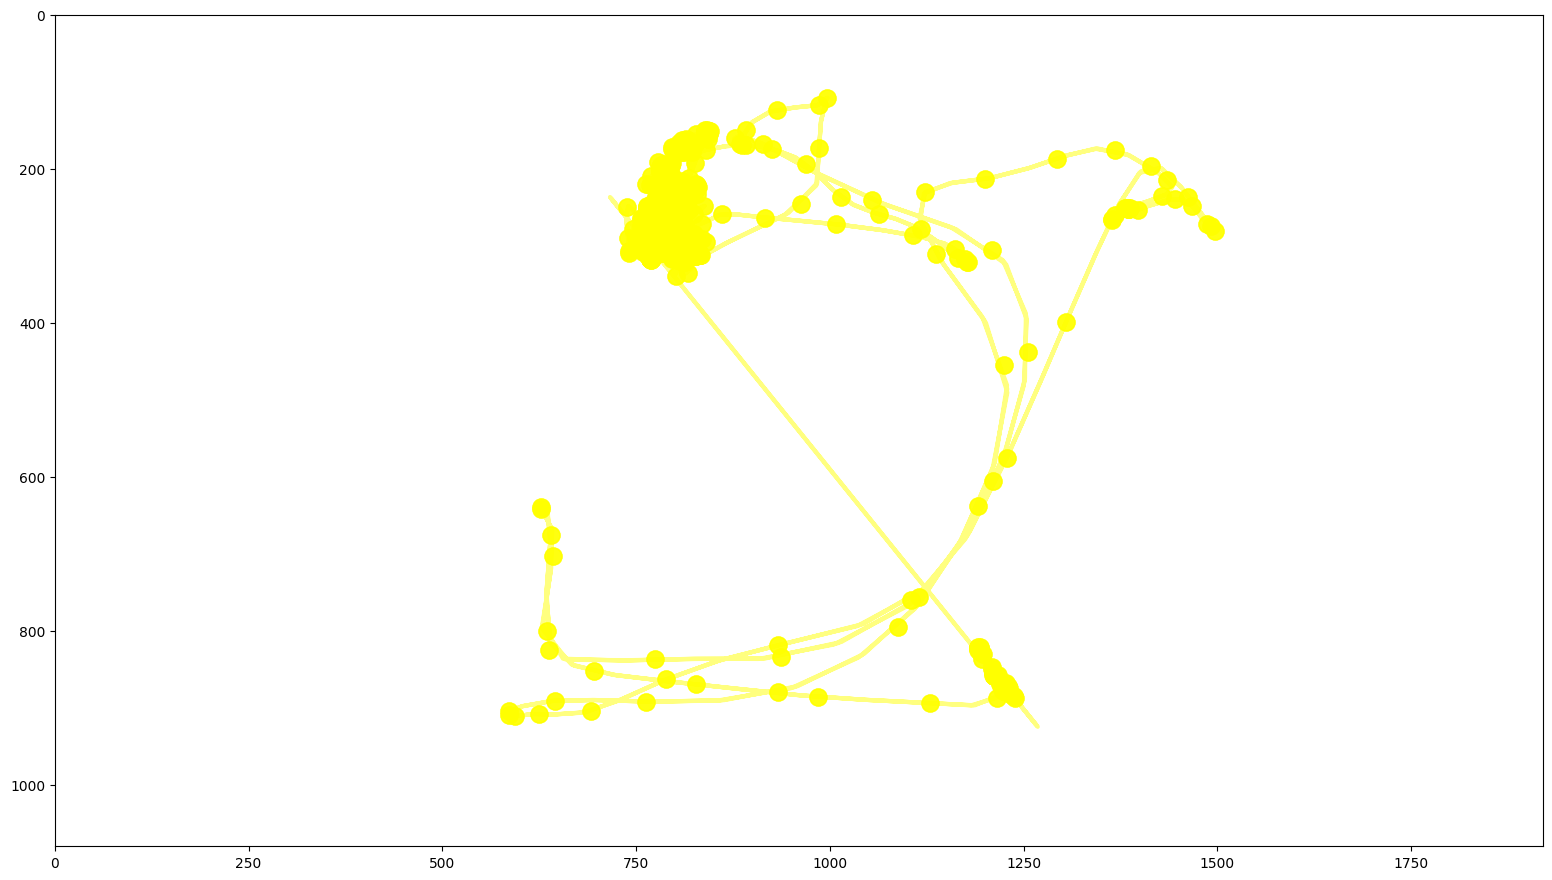

In [13]:
df = pd.read_csv(output_path)
df.columns = df.columns.str.strip()
df = replace_zero_coordinates(df)

x = df["x"].values
y = df["y"].values

t = np.linspace(0, len(x) - 1, 20000)  
spl_x = make_interp_spline(range(len(x)), x, k=3)  
spl_y = make_interp_spline(range(len(y)), y, k=3)  
smooth_x = spl_x(t)
smooth_y = spl_y(t)

fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_xlim(0, 1920)
ax.set_ylim(0, 1080)
ax.invert_yaxis()
plt.gca().set_facecolor((0, 0, 0, 0)) 
plt.plot(smooth_x, smooth_y, color="yellow", alpha=0.5, linewidth=3) 
plt.scatter(x, y, color="yellow", alpha=0.6, s=150) 
plt.savefig(output_image_path, format=picture_format, transparent=True, bbox_inches="tight", pad_inches=0, dpi=300)
plt.show()
plt.close()